In [1]:
import pandas as pd
import numpy as np
import os
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D, Flatten, Dropout, InputLayer, Conv2D, MaxPooling2D
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.optimizers import Adam
from tensorflow.python.client import device_lib
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

config = tf.ConfigProto(device_count = {'GPU':0,'CPU':56})
#config = tf.ConfigProto(log_device_placement=True)
sess = tf.Session(config = config)
keras.backend.set_session(sess)
K.tensorflow_backend._get_available_gpus()
print(device_lib.list_local_devices())

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7282902179165162720
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12793170821950220552
physical_device_desc: "device: XLA_CPU device"
]


In [2]:
tf.GraphKeys.VARIABLES = tf.GraphKeys.GLOBAL_VARIABLES

In [3]:
tf.test.gpu_device_name()

''

In [4]:
#Descarga de pesos
img_rows, img_cols, img_channel = 128, 128, 3

In [5]:
modelo = Sequential()

modelo.add(Conv2D(32, (7, 7), activation='relu', input_shape=(img_rows, img_cols, img_channel)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(64, (5, 5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Dropout(0.25))

modelo.add(Conv2D(128, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Dropout(0.5))

modelo.add(Flatten())
modelo.add(Dense(128, activation='relu'))
modelo.add(Dense(30, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [6]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 
train_generator=train_datagen.flow_from_directory('./comida/', 
                                                 target_size=(128,128),
                                                 color_mode='rgb',
                                                 batch_size=30,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 3848 images belonging to 30 classes.


In [7]:
#Entrenamiento del modelo:
modelo.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])



step_size_train=train_generator.n//train_generator.batch_size
modelo.fit_generator(generator=train_generator,
                     steps_per_epoch=step_size_train,
                     epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20


/home/alfredo/anaconda3/envs/my_env/lib/python3.6/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


128/128 [==============================] - 264s 2s/step - loss: 3.1308 - acc: 0.1362
Epoch 2/20
128/128 [==============================] - 243s 2s/step - loss: 2.6623 - acc: 0.2473
Epoch 3/20
128/128 [==============================] - 268s 2s/step - loss: 2.3641 - acc: 0.3293
Epoch 4/20
128/128 [==============================] - 266s 2s/step - loss: 2.0567 - acc: 0.4061
Epoch 5/20
128/128 [==============================] - 241s 2s/step - loss: 1.6582 - acc: 0.5063
Epoch 6/20
128/128 [==============================] - 229s 2s/step - loss: 1.2625 - acc: 0.6264
Epoch 7/20
128/128 [==============================] - 226s 2s/step - loss: 0.9357 - acc: 0.7146
Epoch 8/20
128/128 [==============================] - 227s 2s/step - loss: 0.7241 - acc: 0.7729
Epoch 9/20
128/128 [==============================] - 225s 2s/step - loss: 0.4972 - acc: 0.8440
Epoch 10/20
128/128 [==============================] - 226s 2s/step - loss: 0.4345 - acc: 0.8688
Epoch 11/20
128/128 [=============================

PIL image size (128, 128)


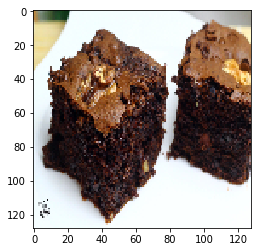

In [26]:
filename = 'brownie.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(128, 128))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

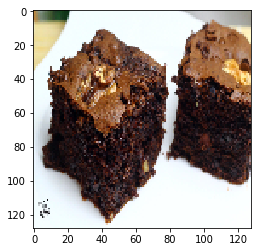

numpy array size (128, 128, 3)


In [27]:
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

image batch size (1, 128, 128, 3)


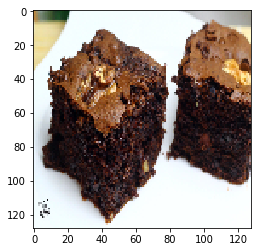

In [28]:
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [29]:
predictions = modelo.predict(image_batch)
print(np.argmax(predictions))

5


In [13]:
import os
target_dir = './modelos2/'
if not os.path.exists(target_dir):
    os.mkdir(target_dir)
modelo.save('./modelos2/model.h5')
modelo.save_weights('./modelos2/weights.h5')